# ¿Qué es un Histograma?
El histograma es una transformación que puede ser aplicada a imágenes, que pone en evidencia características estadísticas de la misma. Puede describirse como una función discreta
$$ h(r_k) = n_k $$
Donde $ r_k $ es un nivel dentro del rango de $ L $ niveles de la imagen, y $ n_k $ es la cantidad de puntos de la imagen que poseen ese nivel. También se puede normalizar esta transformación, dividiendo por el número total de pixels, resultando en que la función sea:
$$ h(r_k) = n_k / N_{pixels}

Cabe destacar también que esta transformación no es reversible, es decir, no hay una relación univoca entre una imagen y un histograma, ya que multiples imágenes pueden tener un mismo histograma.

<img src="..\resources\equi-histogram-images.png">

Las imágenes anteriores compartiran un histograma con la mitad de sus valores en el máximo (blanco), y la otra mitad en un tono de gris, siendo todas ellas distintas.

# Ejemplo de histograma
A continuación se presentará un código que calcula el histograma par auna imagen en escala de gris.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
im = Image.open('..\\resources\\lena.tif')

Text(0.5, 1.0, 'Imagen original')

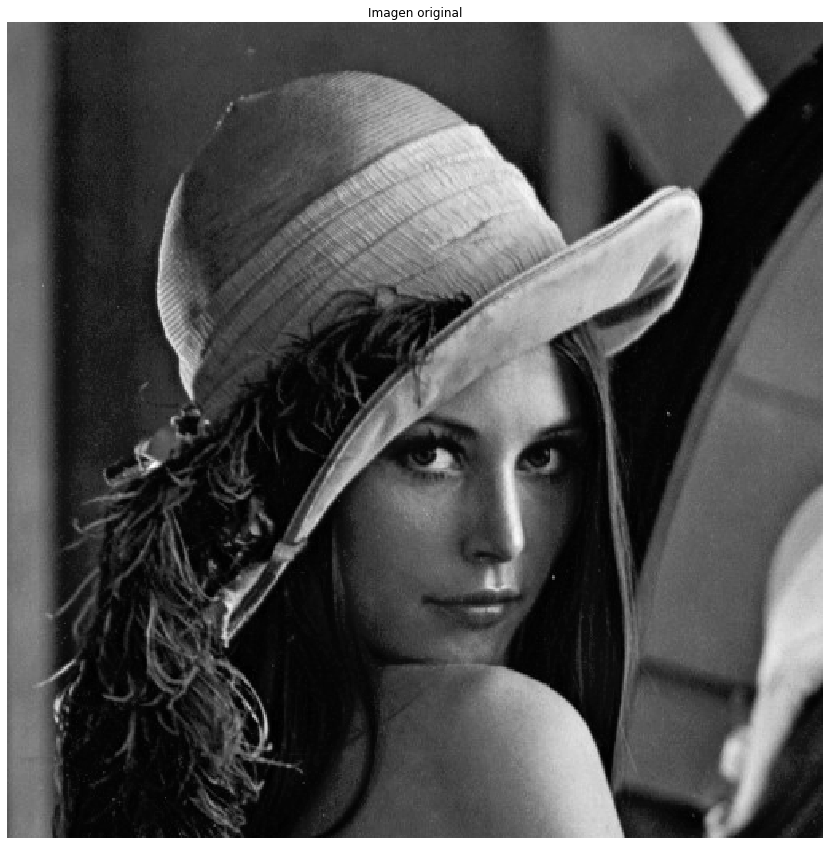

In [18]:
fig = plt.figure()
fig.set_size_inches(15, 15)
plt.axis('off')
plt.imshow(im, cmap='gray')
plt.title('Imagen original')

A priori, se observan muchas zonas oscuras en la imagen, y pocas blancas y brillantes (apenas tal vez en algunos bordes), por lo cual es de esperar un histograma con mayor densidad de valores en su parte baja.

In [19]:
def histogram(img: np.array, levels=256, plot=False):
    hist = np.zeros(levels)
    for pixel in img.flatten():
        hist[int(pixel)] += 1

    if plot:
        fig = plt.figure()
        fig.set_size_inches(15, 15)
        plt.stem(hist, use_line_collection=True)
        plt.grid()
        plt.title('Histograma')

    return hist

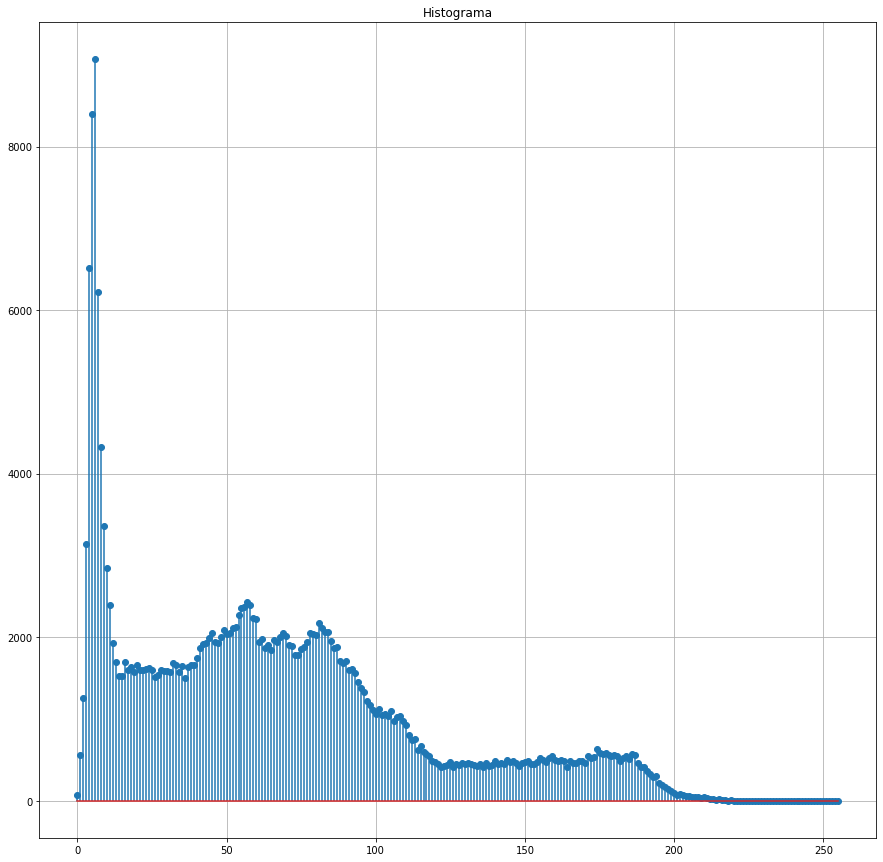

In [20]:
im_data = np.array(list(im.getdata()))
_ = histogram(im_data, plot=True)

Efectivamente los resultados se condicen con lo esperado, con una alta densidad de pixels en la parte baja del histograma, es decir, oscuros.